In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_excel('https://query.data.world/s/n4cox2stftzzg7hzebjn6gojqwyjpx')
df.head()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Diabetes,Unnamed: 16,Unnamed: 17
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,6.0,6.0
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,NaN,NaN
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,NaN,NaN
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,NaN,NaN
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,NaN,NaN


In [3]:
df.describe()

,Patient number,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Height,Weight,BMI,Systolic BP,Diastolic BP,waist,hip,Waist/hip ratio,Unnamed: 16,Unnamed: 17
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,1.0,1.0
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385,6.0,6.0
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212,NaN,NaN
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,6.0,6.0
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000,6.0,6.0
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000,6.0,6.0
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000,6.0,6.0
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000,6.0,6.0


In [4]:
cdf = df[['Age','BMI','waist','HDL Chol','Weight','Height']]
cdf.head(15)

,Age,BMI,waist,HDL Chol,Weight,Height
0,19,22.5,32,49,119,61
1,19,26.4,33,41,135,60
2,20,29.3,40,54,187,67
3,20,19.6,31,70,114,64
4,20,20.2,32,67,141,70
5,20,27.6,37,64,161,64
6,20,21.0,31,49,115,62
7,20,19.7,29,63,145,72
8,20,24.9,31,64,159,67
9,20,35.5,34,60,170,58


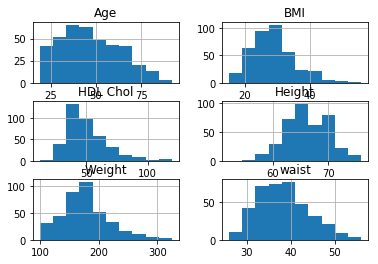

In [5]:
viz = cdf[['Age','BMI','waist','HDL Chol','Weight','Height']]
viz.hist()
plt.show()

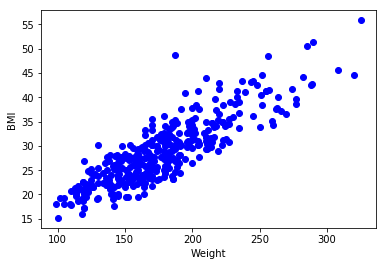

In [6]:
plt.scatter(cdf.Weight, cdf.BMI,  color='blue')
plt.xlabel("Weight")
plt.ylabel("BMI")
plt.show()

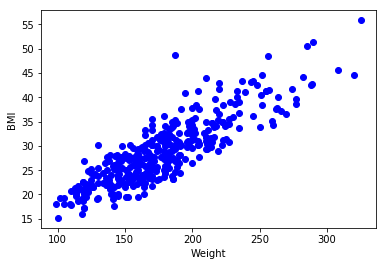

In [7]:
plt.scatter(cdf.Weight, cdf.BMI,  color='blue')
plt.xlabel("Weight")
plt.ylabel("BMI")
plt.show()

In [0]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

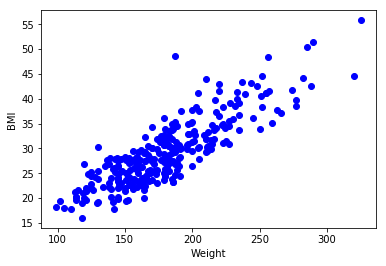

In [9]:
plt.scatter(train.Weight, train.BMI,  color='blue')
plt.xlabel("Weight")
plt.ylabel("BMI")
plt.show()

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Weight']])
train_y = np.asanyarray(train[['BMI']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.14385022]]
Intercept:  [3.28333686]


Text(0, 0.5, 'BMI')

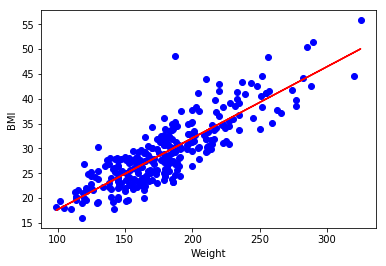

In [11]:
plt.scatter(train.Weight, train.BMI,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Weight")
plt.ylabel("BMI")

In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Weight']])
test_y = np.asanyarray(test[['BMI']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 2.42
R2-score: 0.75
